# <font color='blue'>Data Science Academy</font>
# <font color='blue'>Deep Learning I</font>
# Dataset Augmentation

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.7.6


Dados de alta qualidade são a chave do sucesso para os grandes modelos de aprendizagem de máquina. Mas dados de qualidade não crescem em árvores, e essa escassez pode impedir o desenvolvimento de um modelo. Uma maneira de contornar a falta de dados é aumentar seu conjunto de dados (termo em inglês conhecido como Dataset Augmentation). As abordagens inteligentes para o aumento programático de dados podem aumentar o tamanho do seu conjunto de treinamento 10 vezes ou mais. Ainda melhor, seu modelo será muitas vezes mais robusto, com menos possibilidade de overfitting e pode até ser mais simples devido a um conjunto de treinamento melhor.


Existem várias abordagens para aumentar os dados. As abordagens mais simples incluem a adição de ruído e a aplicação de transformações nos dados existentes. Imputação e redução dimensional podem ser usadas para adicionar amostras em áreas esparsas do conjunto de dados. Abordagens mais avançadas incluem simulação de dados baseados em sistemas dinâmicos ou sistemas evolutivos. Aqui, vamos nos concentrar nas duas abordagens mais simples: adicionar ruído e aplicar transformações.

## Keras Image Augmentation API

Assim como as demais atividades no Keras, a API de aumento de imagem é simples e poderosa. O Keras fornece a classe ImageDataGenerator() que define a configuração para a preparação e o aumento de dados de imagens. Isso inclui recursos como:

* Padronização de amostragem.
* Padronização em função de recursos.
* Branqueamento ZCA.
* Rotação aleatória, shifts, shear e flips.
* Reordenação de dimensão.


https://keras.io/preprocessing/image/

In [2]:
# Verificando se a GPU tem memória disponível
!nvidia-smi

Sun May  3 17:34:08 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 440.64.00    CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  TITAN X (Pascal)    On   | 00000000:05:00.0 Off |                  N/A |
| 23%   39C    P8     9W / 250W |    114MiB / 12194MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce GTX 108...  On   | 00000000:09:00.0 Off |                  N/A |
| 23%   34C    P8     9W / 250W |      2MiB / 11178MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  T

In [3]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
!pip install -q -U watermark

### Carregando o Dataset Original

In [4]:
import keras
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


### Visualizando as 24 Primeiras Imagens de Treino

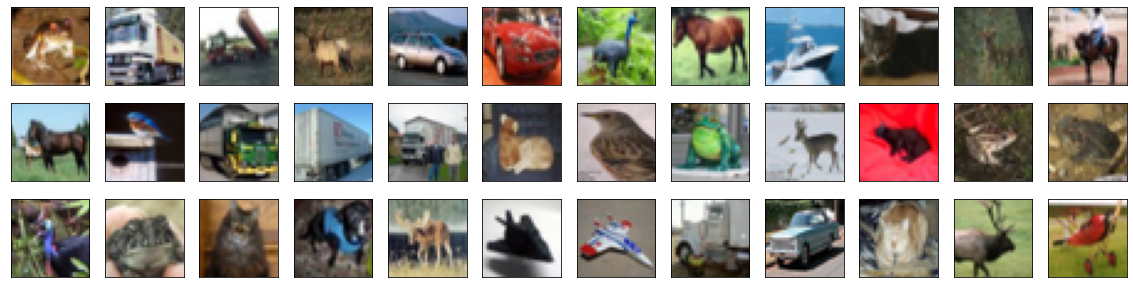

In [5]:
import tensorflow
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

In [6]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

numpy      1.18.2
tensorflow 2.1.0
keras      2.3.1
Data Science Academy


### Aplicando Escala aos dados dividindo cada pixel de cada imagem por 255.

In [7]:
# Escala [0,255] --> [0,1]
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255 

### Dividindo os dados em treino, validação e teste

In [8]:
from keras.utils import np_utils

# Dados de treino e validação
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# Aplicando One-Hot encoding aos labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)

# Print do shape dos dados de treino
print('Shape dos Dados de Treino:', x_train.shape)

# Print do total em cada dataset
print(x_train.shape[0], 'exemplos de treino')
print(x_test.shape[0], 'exemplos de teste')
print(x_valid.shape[0], 'exemplos de validação')

Shape dos Dados de Treino: (45000, 32, 32, 3)
45000 exemplos de treino
10000 exemplos de teste
5000 exemplos de validação


### Criando e Configurando o Augmented Image Generator (Keras)

In [9]:
from keras.preprocessing.image import ImageDataGenerator

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# Cria e configura augmented image generator no dataset de treino
datagen_train = ImageDataGenerator(
    width_shift_range = 0.1,   # Altera de forma randômica as imagens horizontalmente (10% da largura total)
    height_shift_range = 0.1,  # Altera de forma randômica as imagens verticalmente (10% da altura total)
    horizontal_flip = True)    # De forma randômica inverte imagens horizontalmente

# Cria e configura augmented image generator no dataset de validação
datagen_valid = ImageDataGenerator(
    width_shift_range = 0.1,   # Altera de forma randômica as imagens horizontalmente (10% da largura total)
    height_shift_range = 0.1,  # Altera de forma randômica as imagens verticalmente (10% da altura total)
    horizontal_flip = True)    # De forma randômica inverte imagens horizontalmente

# Fit augmented image generator nos dados de treino e validação
datagen_train.fit(x_train)
datagen_valid.fit(x_valid)

### Visualizando as Imagens Aumentadas

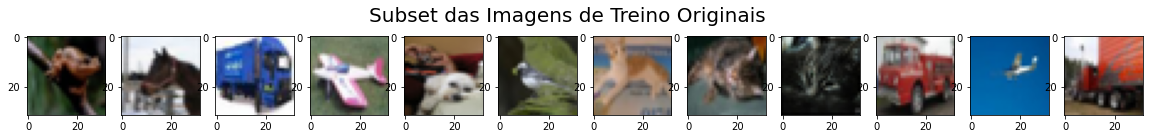

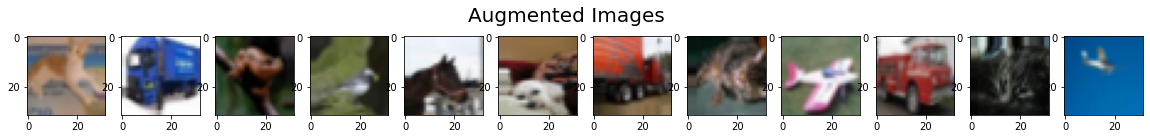

In [10]:
import matplotlib.pyplot as plt

# Subset dos dados de treino
x_train_subset = x_train[:12]

# Visualizando o subset
fig = plt.figure(figsize=(20,2))
for i in range(0, len(x_train_subset)):
    ax = fig.add_subplot(1, 12, i+1)
    ax.imshow(x_train_subset[i])
fig.suptitle('Subset das Imagens de Treino Originais', fontsize = 20)
plt.show()

# Visualizando Augmented Images
fig = plt.figure(figsize=(20,2))
for x_batch in datagen_train.flow(x_train_subset, batch_size=12):
    for i in range(0, 12):
        ax = fig.add_subplot(1, 12, i+1)
        ax.imshow(x_batch[i])
    fig.suptitle('Augmented Images', fontsize = 20)
    plt.show()
    break;

### Definindo a Arquitetura do Modelo

In [11]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = 2, padding = 'same', activation = 'relu', input_shape = (32, 32, 3)))
model.add(MaxPooling2D(pool_size = 2))
model.add(Conv2D(filters = 32, kernel_size = 2, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Conv2D(filters = 64, kernel_size = 2, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 64)         

### Compilando o Modelo

In [12]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

### Treinando o Modelo

In [13]:
from keras.callbacks import ModelCheckpoint   

batch_size = 32
epochs = 100

# Salvando o melhor modelo (melhor conjunto de pesos)
checkpointer = ModelCheckpoint(filepath = 'aug_model.weights.best.hdf5', verbose = 1, save_best_only = True)

# Fit
model.fit_generator(datagen_train.flow(x_train, y_train, batch_size=batch_size),
                    steps_per_epoch=x_train.shape[0] // batch_size,
                    epochs=epochs, verbose=2, callbacks=[checkpointer],
                    validation_data=datagen_valid.flow(x_valid, y_valid, batch_size=batch_size),
                    validation_steps=x_valid.shape[0] // batch_size)

Epoch 1/100
 - 22s - loss: 1.6772 - accuracy: 0.3914 - val_loss: 1.3228 - val_accuracy: 0.4970

Epoch 00001: val_loss improved from inf to 1.32282, saving model to aug_model.weights.best.hdf5
Epoch 2/100
 - 22s - loss: 1.4067 - accuracy: 0.4923 - val_loss: 1.4017 - val_accuracy: 0.5521

Epoch 00002: val_loss did not improve from 1.32282
Epoch 3/100
 - 21s - loss: 1.3108 - accuracy: 0.5306 - val_loss: 1.6100 - val_accuracy: 0.5795

Epoch 00003: val_loss did not improve from 1.32282
Epoch 4/100
 - 21s - loss: 1.2479 - accuracy: 0.5562 - val_loss: 1.4272 - val_accuracy: 0.6089

Epoch 00004: val_loss did not improve from 1.32282
Epoch 5/100
 - 21s - loss: 1.2059 - accuracy: 0.5755 - val_loss: 1.0054 - val_accuracy: 0.6244

Epoch 00005: val_loss improved from 1.32282 to 1.00542, saving model to aug_model.weights.best.hdf5
Epoch 6/100
 - 21s - loss: 1.1908 - accuracy: 0.5804 - val_loss: 0.9468 - val_accuracy: 0.6145

Epoch 00006: val_loss improved from 1.00542 to 0.94678, saving model to aug

 - 21s - loss: 1.6803 - accuracy: 0.4234 - val_loss: 1.5924 - val_accuracy: 0.4696

Epoch 00055: val_loss did not improve from 0.73690
Epoch 56/100
 - 21s - loss: 1.6717 - accuracy: 0.4272 - val_loss: 1.3306 - val_accuracy: 0.5274

Epoch 00056: val_loss did not improve from 0.73690
Epoch 57/100
 - 22s - loss: 1.6936 - accuracy: 0.4184 - val_loss: 1.2894 - val_accuracy: 0.4787

Epoch 00057: val_loss did not improve from 0.73690
Epoch 58/100
 - 21s - loss: 1.6895 - accuracy: 0.4171 - val_loss: 1.4197 - val_accuracy: 0.5167

Epoch 00058: val_loss did not improve from 0.73690
Epoch 59/100
 - 22s - loss: 1.7203 - accuracy: 0.4054 - val_loss: 2.1239 - val_accuracy: 0.3796

Epoch 00059: val_loss did not improve from 0.73690
Epoch 60/100
 - 21s - loss: 1.7218 - accuracy: 0.4055 - val_loss: 1.4002 - val_accuracy: 0.4781

Epoch 00060: val_loss did not improve from 0.73690
Epoch 61/100
 - 22s - loss: 1.7320 - accuracy: 0.3991 - val_loss: 1.5309 - val_accuracy: 0.4656

Epoch 00061: val_loss did no

### Carregando o modelo com melhor acurácia em validação

In [14]:
model.load_weights('aug_model.weights.best.hdf5')

### Calculando a Acurácia nos Dados de Teste

In [15]:
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Acurácia em Teste:', score[1])


 Acurácia em Teste: 0.654699981212616


## Exemplos de Técnicas Usadas em Dataset Augmentation

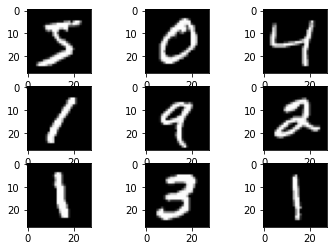

In [16]:
# Plot images
from keras.datasets import mnist
from matplotlib import pyplot

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Grid 3x3 
for i in range(0, 9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))

pyplot.show()

### Feature Standardization

Também é possível padronizar valores de pixels em todo o conjunto de dados. Isso é chamado de padronização de recursos e reflete o tipo de padronização frequentemente executada para cada coluna em um conjunto de dados tabular.

Você pode executar a padronização de recursos configurando os argumentos featurewise_center e featurewise_std_normalization na classe ImageDataGenerator. Estes são, de fato, definidos como True por padrão e criar uma instância do ImageDataGenerator sem argumentos terá o mesmo efeito.

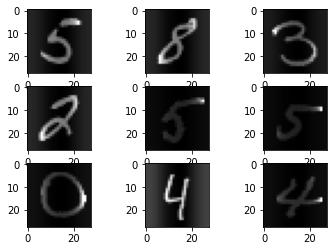

In [17]:
# Padronização de imagens em todo o conjunto de dados, mean = 0, stdev = 1
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from keras import backend as K
K.common.set_image_dim_ordering('th')

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)

datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))

    pyplot.show()
    break

### ZCA Whitening

Uma transformação de branqueamento de uma imagem é uma operação de álgebra linear que reduz a redundância na matriz de imagens de pixel. Menos redundância na imagem destina-se a melhor destacar as estruturas e características da imagem para o algoritmo de aprendizagem.

Normalmente, o branqueamento de imagem é realizado usando a técnica de Análise de Componentes Principais (PCA). Mais recentemente, uma alternativa chamada ZCA (http://ufldl.stanford.edu/wiki/index.php/Whitening) mostra melhores resultados em imagens transformadas que mantêm todas as dimensões originais e, ao contrário do PCA, as imagens transformadas resultantes ainda se parecem com seus originais.

Você pode executar uma transformação ZCA Whitening configurando o argumento zca_whitening como True.

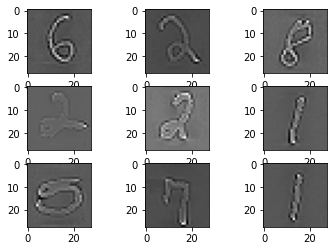

In [18]:
# ZCA whitening
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from keras import backend as K
K.common.set_image_dim_ordering('th')

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

datagen = ImageDataGenerator(zca_whitening=True)

datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))

    pyplot.show()
    break

### Random Rotations

Às vezes, as imagens em seus dados de amostra podem ter rotações variadas e diferentes na cena. Você pode treinar seu modelo para melhor manipular rotações de imagens, girando artificial e aleatoriamente imagens de seu conjunto de dados durante o treinamento. O exemplo abaixo cria rotações aleatórias dos dígitos MNIST até 90 graus, definindo o argumento rotation_range.

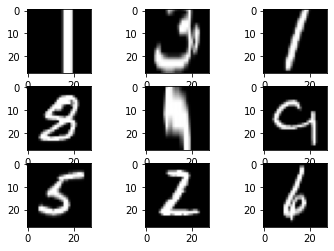

In [19]:
# Random Rotations
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from keras import backend as K
K.common.set_image_dim_ordering('th')

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

datagen = ImageDataGenerator(rotation_range=90)

datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))

    pyplot.show()
    break

### Random Shifts

Os objetos nas suas imagens podem não estar centrados no frame. Eles podem estar fora do centro de uma variedade de maneiras diferentes.

Você pode treinar sua rede de aprendizado profundo para lidar com objetos fora do centro, criando artificialmente versões deslocadas de seus dados de treinamento. O Keras suporta shift horizontal e vertical de dados de treinamento pelos argumentos width_shift_range e height_shift_range.

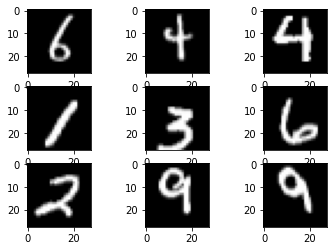

In [20]:
# Random Shifts
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from keras import backend as K
K.common.set_image_dim_ordering('th')

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

shift = 0.2
datagen = ImageDataGenerator(width_shift_range=shift, height_shift_range=shift)

datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))

    pyplot.show()
    break

### Random Flips

Outro aumento nos dados de imagem que podem melhorar o desempenho em problemas grandes e complexos é criar random flips de imagens em seus dados de treinamento.

O Keras suporta flipping aleatório ao longo dos eixos vertical e horizontal usando os argumentos vertical_flip e horizontal_flip.

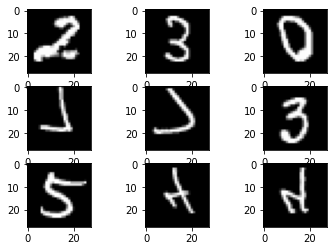

In [21]:
# Random Flips
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from keras import backend as K
K.common.set_image_dim_ordering('th')

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)

datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))

    pyplot.show()
    break

### Salvando Imagens Aumentadas para Arquivo

A preparação e o aumento de dados são realizados apenas just-in time no Keras.

Isso é eficiente em termos de memória, mas pode ser necessário salvar imagens usadas durante o treinamento. Por exemplo, talvez você queira usá-las com um pacote de software diferente mais tarde ou apenas gerá-las uma vez e usá-las em vários modelos ou configurações diferentes de aprendizagem profunda.

O Keras permite que você salve as imagens geradas durante o treinamento. O diretório, o prefixo do nome do arquivo e o tipo de arquivo de imagem podem ser especificados para a função flow() antes do treinamento. Então, durante o treinamento, as imagens geradas serão gravadas no arquivo.

O exemplo abaixo demonstra isso e grava 9 imagens em um subdiretório "imagens" com o prefixo "aug" e o tipo de arquivo PNG.

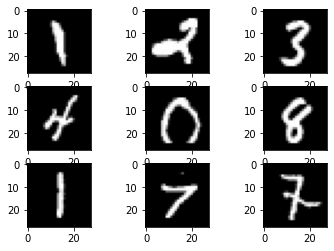

In [22]:
# Save augmented images to file
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
import os
from keras import backend as K
K.common.set_image_dim_ordering('th')

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

datagen = ImageDataGenerator()

datagen.fit(X_train)

# Caso não tenha o diretório images, descomentar o código abaixo.
#os.makedirs('images')
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):

    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
        
        # Salva a imagem em disco (crie o diretório images)
        pyplot.imsave('images/img'+str(i)+'.png', X_batch[i].reshape(28, 28))

    pyplot.show()
    break

# Fim